In [1]:
!python3 -m pip install --upgrade pip

In [2]:
!pip install torchvision timm

In [3]:
# 导入必要的库
import torch
import timm

# 定义加载模型的函数
def load_efficientnet_b0(model_path, num_classes=39, device=None):
    """
    加载保存的 EfficientNet-B0 模型
    
    参数:
        model_path: 模型权重文件路径，字符串类型
        num_classes: 分类类别数量，整数类型，默认为39
        device: 计算设备，默认为自动检测
    
    返回:
        model: 加载好的模型对象
    """
    # 检测设备
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # 创建与训练时相同的模型结构
    model = timm.create_model('efficientnet_b0', pretrained=False, num_classes=num_classes)
    
    # 加载模型权重
    model.load_state_dict(torch.load(model_path, map_location=device))
    
    # 将模型移至指定设备并设置为评估模式
    model = model.to(device)
    model.eval()
    
    return model

# 使用示例

model_path = "EfficientNet-B0.pth"
    
    # 加载模型
model = load_efficientnet_b0(model_path)
print("The model has been successfully loaded")#the model has been successfully loaded

The model has been successfully loaded


In [4]:
# 植物病害类别列表（39类，最后一类是背景）
# Plant disease class list (39 classes, last is 'background')
disease_names = [
    'Apple___Apple_scab',  # 苹果黑星病 Apple scab
    'Apple___Black_rot',  # 苹果黑腐病 Apple Black rot
    'Apple___Cedar_apple_rust',  # 苹果雪松锈病 Apple Cedar apple rust
    'Apple___healthy',  # 苹果健康 Apple healthy
    'Blueberry___healthy',  # 蓝莓健康 Blueberry healthy
    'Cherry_(including_sour)___Powdery_mildew',  # 樱桃白粉病 Cherry Powdery mildew
    'Cherry_(including_sour)___healthy',  # 樱桃健康 Cherry healthy
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',  # 玉米灰斑病 Corn Gray leaf spot
    'Corn_(maize)___Common_rust_',  # 玉米普通锈病 Corn Common rust
    'Corn_(maize)___Northern_Leaf_Blight',  # 玉米北方叶斑病 Corn Northern Leaf Blight
    'Corn_(maize)___healthy',  # 玉米健康 Corn healthy
    'Grape___Black_rot',  # 葡萄黑腐病 Grape Black rot
    'Grape___Esca_(Black_Measles)',  # 葡萄腐烂病 Grape Esca (Black Measles)
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',  # 葡萄叶枯病 Grape Leaf blight (Isariopsis Leaf Spot)
    'Grape___healthy',  # 葡萄健康 Grape healthy
    'Orange___Haunglongbing_(Citrus_greening)',  # 橙黄龙病 Orange Huanglongbing (Citrus greening)
    'Peach___Bacterial_spot',  # 桃细菌性斑点 Peach Bacterial spot
    'Peach___healthy',  # 桃健康 Peach healthy
    'Pepper,_bell___Bacterial_spot',  # 灯笼椒细菌性斑点 Pepper, bell Bacterial spot
    'Pepper,_bell___healthy',  # 灯笼椒健康 Pepper, bell healthy
    'Potato___Early_blight',  # 马铃薯早疫病 Potato Early blight
    'Potato___Late_blight',  # 马铃薯晚疫病 Potato Late blight
    'Potato___healthy',  # 马铃薯健康 Potato healthy
    'Raspberry___healthy',  # 树莓健康 Raspberry healthy
    'Soybean___healthy',  # 大豆健康 Soybean healthy
    'Squash___Powdery_mildew',  # 南瓜白粉病 Squash Powdery mildew
    'Strawberry___Leaf_scorch',  # 草莓叶灼病 Strawberry Leaf scorch
    'Strawberry___healthy',  # 草莓健康 Strawberry healthy
    'Tomato___Bacterial_spot',  # 番茄细菌性斑点 Tomato Bacterial spot
    'Tomato___Early_blight',  # 番茄早疫病 Tomato Early blight
    'Tomato___Late_blight',  # 番茄晚疫病 Tomato Late blight
    'Tomato___Leaf_Mold',  # 番茄叶霉病 Tomato Leaf Mold
    'Tomato___Septoria_leaf_spot',  # 番茄叶斑病 Tomato Septoria leaf spot
    'Tomato___Spider_mites Two-spotted_spider_mite',  # 番茄二斑叶螨 Tomato Spider mites (Two-spotted spider mite)
    'Tomato___Target_Spot',  # 番茄靶斑病 Tomato Target Spot
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',  # 番茄黄化卷叶病毒病 Tomato Yellow Leaf Curl Virus
    'Tomato___Tomato_mosaic_virus',  # 番茄花叶病毒病 Tomato mosaic virus
    'Tomato___healthy',  # 番茄健康 Tomato healthy
    'background'  # 背景背景（非植物）Background (non-plant)
]


In [15]:
!ls -l /dev/video*

crw-rw---- 1 root video 81, 0 May  1 00:54 /dev/video0


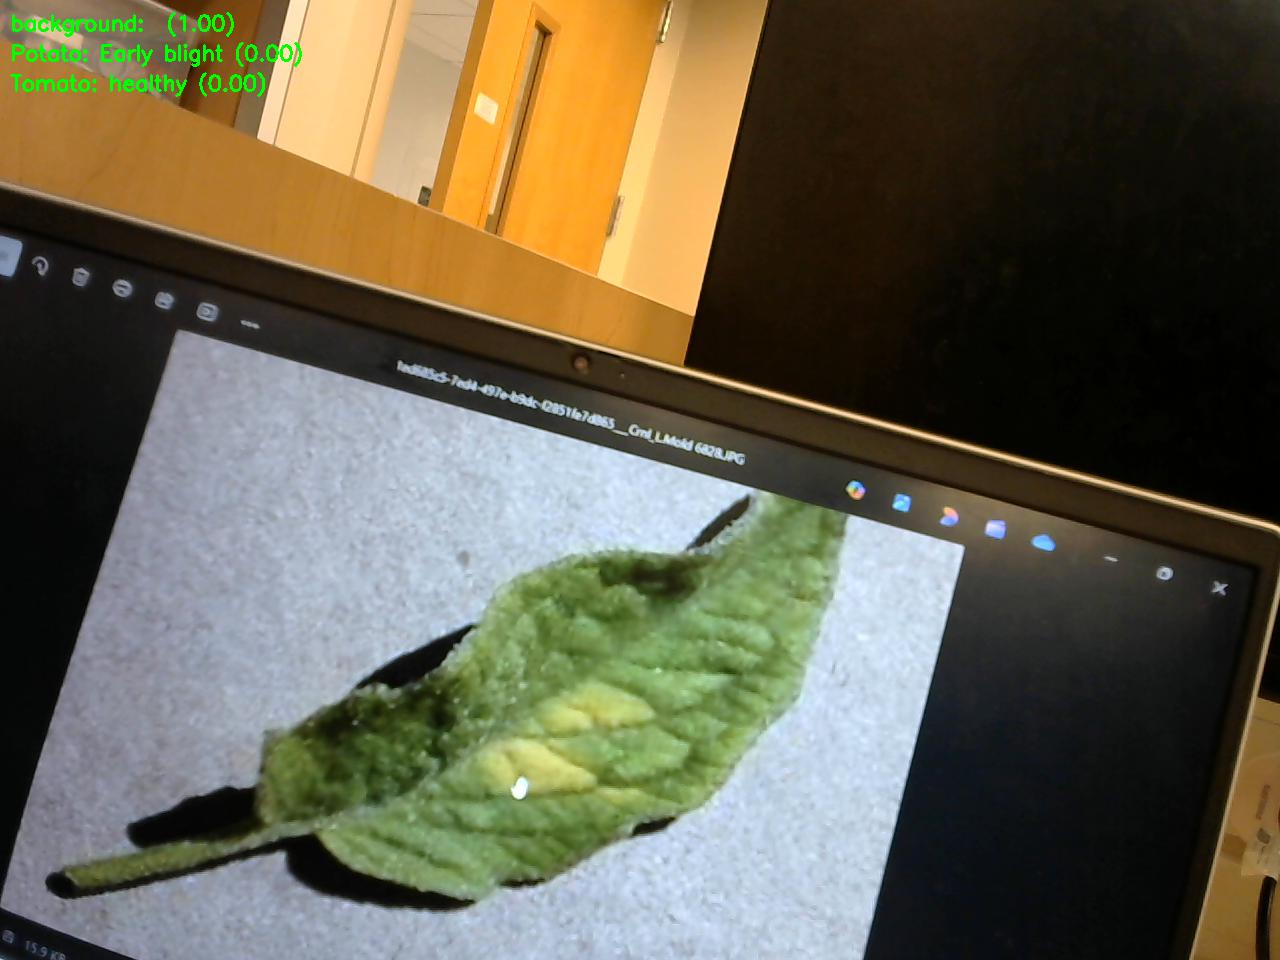

In [ ]:
import torch
import camera_predict                              # 导入你的脚本模块
from camera_predict import live_plant_disease_detection

# 1. 把 initialize_model 变成一个 identity 函数，这样它就不会再去 load_state_dict
camera_predict.initialize_model = lambda model, weights_path, device: model

# 2. 设置设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 3. 直接调用 live_plant_disease_detection，
#    传入已经加载好权重并 to(device) 的 model，
#    weights_path 传 None（不会被用到）
live_plant_disease_detection(
    model=model,             # 你 notebook 里已经 load 好的模型
    weights_path=None,       # 占位，不会再被用到
    device=device,           # cuda:0 或 cpu
    disease_names=disease_names,
    cam_id=0                 # 摄像头 ID
)


In [6]:
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
import matplotlib.pyplot as plt
%matplotlib inline

def display_camera_feed():
    # 创建VideoCapture对象
    cap = cv2.VideoCapture(0)
    
    # 检查摄像头是否成功打开
    if not cap.isOpened():
        print("无法打开摄像头")
        return
    
    try:
        while True:
            # 读取一帧图像
            ret, frame = cap.read()
            
            if ret:
                # 转换颜色空间从 BGR 到 RGB
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                
                # 清除之前的输出
                clear_output(wait=True)
                
                # 使用 matplotlib 显示图像
                plt.figure(figsize=(10,8))
                plt.imshow(frame_rgb)
                plt.axis('off')
                plt.show()
                
                # 短暂延时
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
            else:
                print("无法读取视频帧")
                break
                
    finally:
        # 释放资源
        cap.release()
        plt.close()

if __name__ == "__main__":
    display_camera_feed()



KeyboardInterrupt: 

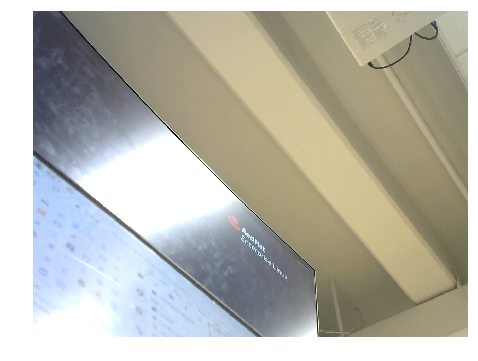

In [ ]:
import cv2
import torch
import time
import numpy as np
from PIL import Image
from torchvision import transforms
from IPython.display import clear_output
import matplotlib.pyplot as plt

# 如果你在 notebook 里，请确保开启 inline 模式
%matplotlib inline

# 1. 定义图像预处理 pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 将 PIL 图像缩放到 224×224
    transforms.ToTensor(),          # 转为 [C×H×W] 的 tensor
])

def predict_frame(model, frame, transform, device):
    """
    预测单帧图像的植物病害类别 Top-3
    Parameters:
      model     (torch.nn.Module): 已加载并置于 device 上的 PyTorch 模型
      frame     (np.ndarray)      : OpenCV BGR 格式图像
      transform (callable)        : torchvision 预处理 pipeline
      device    (torch.device)    : torch.device，比如 torch.device('cuda:0')
    Returns:
      List[tuple]: [(class_idx, class_name, probability), …]，长度固定为 3
    """
    # BGR → RGB → PIL Image
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil = Image.fromarray(rgb)
    # 预处理并增加 batch 维度，搬到指定设备
    x = transform(pil).unsqueeze(0).to(device)
    # 前向推理（不计算梯度）
    with torch.no_grad():
        logits = model(x)
        probs = torch.softmax(logits, dim=1)[0]
    # 取 Top-3 概率及索引
    top_p, top_i = torch.topk(probs, 3)
    return [
        (int(idx.item()), disease_names[idx.item()], float(top_p[j].item()))
        for j, idx in enumerate(top_i)
    ]

def camera_predict_matplotlib(model, disease_names, 
                              interval=0.5, cam_id=0):
    """
    在 Jupyter Notebook 中用 matplotlib 实时显示摄像头预测
    
    Parameters:
      model         (torch.nn.Module): 已加载并置于 cuda:0 的模型
      disease_names (List[str])      : 索引到类别名称的映射
      interval      (float)          : 两次推理的最小时间间隔（秒）
      cam_id        (int)            : VideoCapture 的设备 ID
    """
    # 获取模型所在设备
    device = next(model.parameters()).device
    # 打开摄像头
    cap = cv2.VideoCapture(cam_id)
    if not cap.isOpened():
        print("无法打开摄像头")
        return
    
    print("按 Ctrl+C 停止循环")
    last_t = time.time()
    preds = []  # 存储当前预测结果

    try:
        while True:
            # 读取一帧（BGR 格式）
            ret, frame = cap.read()
            if not ret:
                print("读取视频帧失败，退出")
                break
            
            # 控制推理频率
            now = time.time()
            if now - last_t >= interval:
                preds = predict_frame(model, frame, transform, device)
                last_t = now
            
            # 拷贝一份用于绘制
            disp = frame.copy()
            # 把文字画到 BGR 图上
            for i, (_, name, p) in enumerate(preds):
                plant, cond = name.split('___') if '___' in name else (name, '')
                plant = plant.replace('_',' ')
                cond  = cond.replace('_',' ')
                text = f"{plant}: {cond} ({p:.2f})"
                cv2.putText(disp, text, (10, 30+30*i),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
            
            # BGR → RGB 用于 matplotlib
            disp_rgb = cv2.cvtColor(disp, cv2.COLOR_BGR2RGB)
            # 清除上一次输出，显示当前帧
            clear_output(wait=True)
            plt.figure(figsize=(8,6))
            plt.imshow(disp_rgb)
            plt.axis('off')
            plt.show()
            
    except KeyboardInterrupt:
        # 捕捉 Ctrl+C 退出
        print("已停止实时预测")
    finally:
        # 释放摄像头资源
        cap.release()
        plt.close()

# 用法示例（假设 model 已经载入并 to('cuda:0')，disease_names 已定义）：
camera_predict_matplotlib(model, disease_names)


In [5]:
import cv2
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
import time

# 定义图像预处理转换
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整大小为 224x224
    transforms.ToTensor(),          # 转换为张量
])

# 简化的预测函数
def predict_frame(model, frame, transform, device):
    """预测单帧图像的植物病害类别"""
    # 将BGR图像转换为RGB，然后转为PIL图像
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(rgb_frame)
    
    # 预处理图像
    image_tensor = transform(pil_image).unsqueeze(0).to(device)
    
    # 预测
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)[0]
    
    # 获取前3个预测结果
    top_probs, top_indices = torch.topk(probabilities, 3)
    
    # 构建结果列表
    results = []
    for i in range(3):
        idx = top_indices[i].item()
        results.append((idx, disease_names[idx], top_probs[i].item()))
    
    return results

# 简化的摄像头实时预测函数
def camera_predict_simple():
    # 获取设备
    device = next(model.parameters()).device
    print(f"使用设备: {device}")
    
    # 初始化摄像头
    cap = cv2.VideoCapture(0)
    
    if not cap.isOpened():
        print("无法打开摄像头")
        return
    
    print("摄像头已打开，按 'q' 键退出")
    
    last_prediction_time = time.time()
    prediction_interval = 0.5  # 每0.5秒预测一次
    predictions = []
    
    while True:
        # 捕获一帧图像
        ret, frame = cap.read()
        if not ret:
            print("无法获取图像帧")
            break
        
        # 仅在间隔时间后进行预测
        current_time = time.time()
        if current_time - last_prediction_time > prediction_interval:
            predictions = predict_frame(model, frame, transform, device)
            last_prediction_time = current_time
        
        # 在图像上显示预测结果
        for i, (idx, name, prob) in enumerate(predictions):
            parts = name.split('___')
            plant = parts[0].replace('_', ' ')
            condition = parts[1].replace('_', ' ') if len(parts) > 1 else ''
            text = f"{plant}: {condition} ({prob:.2f})"
            cv2.putText(frame, text, (10, 30 + 30*i), cv2.FONT_HERSHEY_SIMPLEX, 
                        0.7, (0, 255, 0), 2)
        
        # 显示实时画面
        cv2.imshow('植物病害实时检测', frame)
        
        # 按q键退出
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # 释放资源
    cap.release()
    cv2.destroyAllWindows()

# 运行摄像头预测
camera_predict_simple()

使用设备: cuda:0
摄像头已打开，按 'q' 键退出


error: OpenCV(4.5.0) /opt/opencv/modules/highgui/src/window_gtk.cpp:624: error: (-2:Unspecified error) Can't initialize GTK backend in function 'cvInitSystem'


In [ ]:
# 39 plant disease classes with prevention & treatment suggestions (English only)
treatment_dict = {
    "Apple___Apple_scab": "Remove diseased leaves/fruits, improve ventilation, and spray appropriate fungicides.",
    "Apple___Black_rot": "Prune infected branches and apply fungicides during autumn/winter cleanup.",
    "Apple___Cedar_apple_rust": "Plant resistant varieties, prune regularly, and prevent cross-infection.",
    "Apple___healthy": "Plant is healthy, no treatment needed.",
    "Blueberry___healthy": "Plant is healthy, no treatment needed.",
    "Cherry_(including_sour)___Powdery_mildew": "Increase ventilation, remove infected leaves, and spray fungicides like myclobutanil.",
    "Cherry_(including_sour)___healthy": "Plant is healthy, no treatment needed.",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot": "Use resistant varieties, remove infected residues, and practice crop rotation.",
    "Corn_(maize)___Common_rust_": "Remove diseased plants promptly and apply fungicides like triadimefon.",
    "Corn_(maize)___Northern_Leaf_Blight": "Use resistant varieties, enhance field management, and apply fungicides in time.",
    "Corn_(maize)___healthy": "Plant is healthy, no treatment needed.",
    "Grape___Black_rot": "Prune diseased branches, clean fallen leaves/fruits, and spray Bordeaux mixture.",
    "Grape___Esca_(Black_Measles)": "Prune and burn infected branches, maintain vineyard hygiene.",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)": "Remove infected leaves, prune properly, and apply fungicides.",
    "Grape___healthy": "Plant is healthy, no treatment needed.",
    "Orange___Haunglongbing_(Citrus_greening)": "Remove infected trees, control psyllid vectors, and use healthy seedlings.",
    "Peach___Bacterial_spot": "Avoid wounds, plant resistant varieties, and spray copper-based fungicides.",
    "Peach___healthy": "Plant is healthy, no treatment needed.",
    "Pepper,_bell___Bacterial_spot": "Remove diseased plants, improve management, and apply copper fungicides.",
    "Pepper,_bell___healthy": "Plant is healthy, no treatment needed.",
    "Potato___Early_blight": "Practice crop rotation, plant properly, and apply chlorothalonil fungicide.",
    "Potato___Late_blight": "Use resistant varieties, apply fungicides promptly, and avoid field water accumulation.",
    "Potato___healthy": "Plant is healthy, no treatment needed.",
    "Raspberry___healthy": "Plant is healthy, no treatment needed.",
    "Soybean___healthy": "Plant is healthy, no treatment needed.",
    "Squash___Powdery_mildew": "Improve ventilation, control humidity, and spray sulfur-based fungicides.",
    "Strawberry___Leaf_scorch": "Remove infected leaves, avoid excessive moisture, and use fungicides when needed.",
    "Strawberry___healthy": "Plant is healthy, no treatment needed.",
    "Tomato___Bacterial_spot": "Use healthy seedlings, remove diseased leaves, and spray copper fungicides.",
    "Tomato___Early_blight": "Practice crop rotation, spray fungicides promptly, and improve ventilation.",
    "Tomato___Late_blight": "Plant resistant varieties, avoid high humidity, and apply fungicides promptly.",
    "Tomato___Leaf_Mold": "Control humidity, remove diseased leaves, and use special fungicides.",
    "Tomato___Septoria_leaf_spot": "Proper spacing, reduce water splash, and spray fungicides timely.",
    "Tomato___Spider_mites Two-spotted_spider_mite": "Apply acaricides and keep the field clean.",
    "Tomato___Target_Spot": "Improve ventilation and apply fungicides promptly.",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus": "Remove diseased plants, control aphids, and plant resistant varieties.",
    "Tomato___Tomato_mosaic_virus": "Avoid mechanical injuries and use healthy seedlings.",
    "Tomato___healthy": "Plant is healthy, no treatment needed.",
    "background": "No plant or disease detected."
}


In [8]:
# 打开摄像头，0表示第一个摄像头设备
# Open camera, 0 means the first camera device
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()  # 读取一帧图像 Read one frame
    if not ret:
        break

    # 病害识别 Predict disease class
    class_id, conf_score = detect_disease(frame)

    # 画方框 Draw rectangle in the center
    h, w, _ = frame.shape
    pt1 = (w // 4, h // 4)
    pt2 = (w * 3 // 4, h * 3 // 4)
    cv2.rectangle(frame, pt1, pt2, (0, 255, 0), 2)  # 在中心画一个绿色方框 Draw a green rectangle at the center

    # 构造标签文本 Class label text
    label_text = f"{disease_names[class_id]}: {conf_score:.2f}"

    # 查找防治建议，Get treatment suggestion
    suggestion = treatment_dict.get(disease_names[class_id], "No suggestion available.")

    # 在画面左上角写出分类和置信度 Put class/confidence on the top left
    cv2.putText(frame, label_text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    # 在画面下方分行显示防治建议（建议较长自动换行） Put treatment suggestion at the bottom (with word wrapping)
    max_chars_per_line = 50  # 每行最多字数 Max chars per line
    suggestion_lines = [suggestion[i:i+max_chars_per_line] for i in range(0, len(suggestion), max_chars_per_line)]
    for i, line in enumerate(suggestion_lines):
        y_pos = h - 60 + i * 30  # 行距 Line spacing
        cv2.putText(frame, line, (20, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,128,255), 2)

    # 实时显示画面 Real-time show
    cv2.imshow("Plant Disease Detection 植物病害识别", frame)

    # 按q键退出，Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()  # 释放摄像头 Release camera
cv2.destroyAllWindows()  # 关闭所有窗口 Close all windows


KeyboardInterrupt: 